In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
import tensorflow as tf
from sklearn.metrics import r2_score

df = pd.read_csv('/content/mhealth_raw_data.csv')

# Visualizing sample data points
df.shape
df.head(5)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [ ]:
df.shape

(1215745, 14)

In [ ]:
num_samples_per_group = 120009 // len(df['Activity'].unique())
data = df.groupby('Activity').apply(lambda x: x.sample(n=num_samples_per_group, random_state=42))

# Reset the index of the sampled data
data.reset_index(drop=True, inplace=True)
data.shape


(120003, 14)

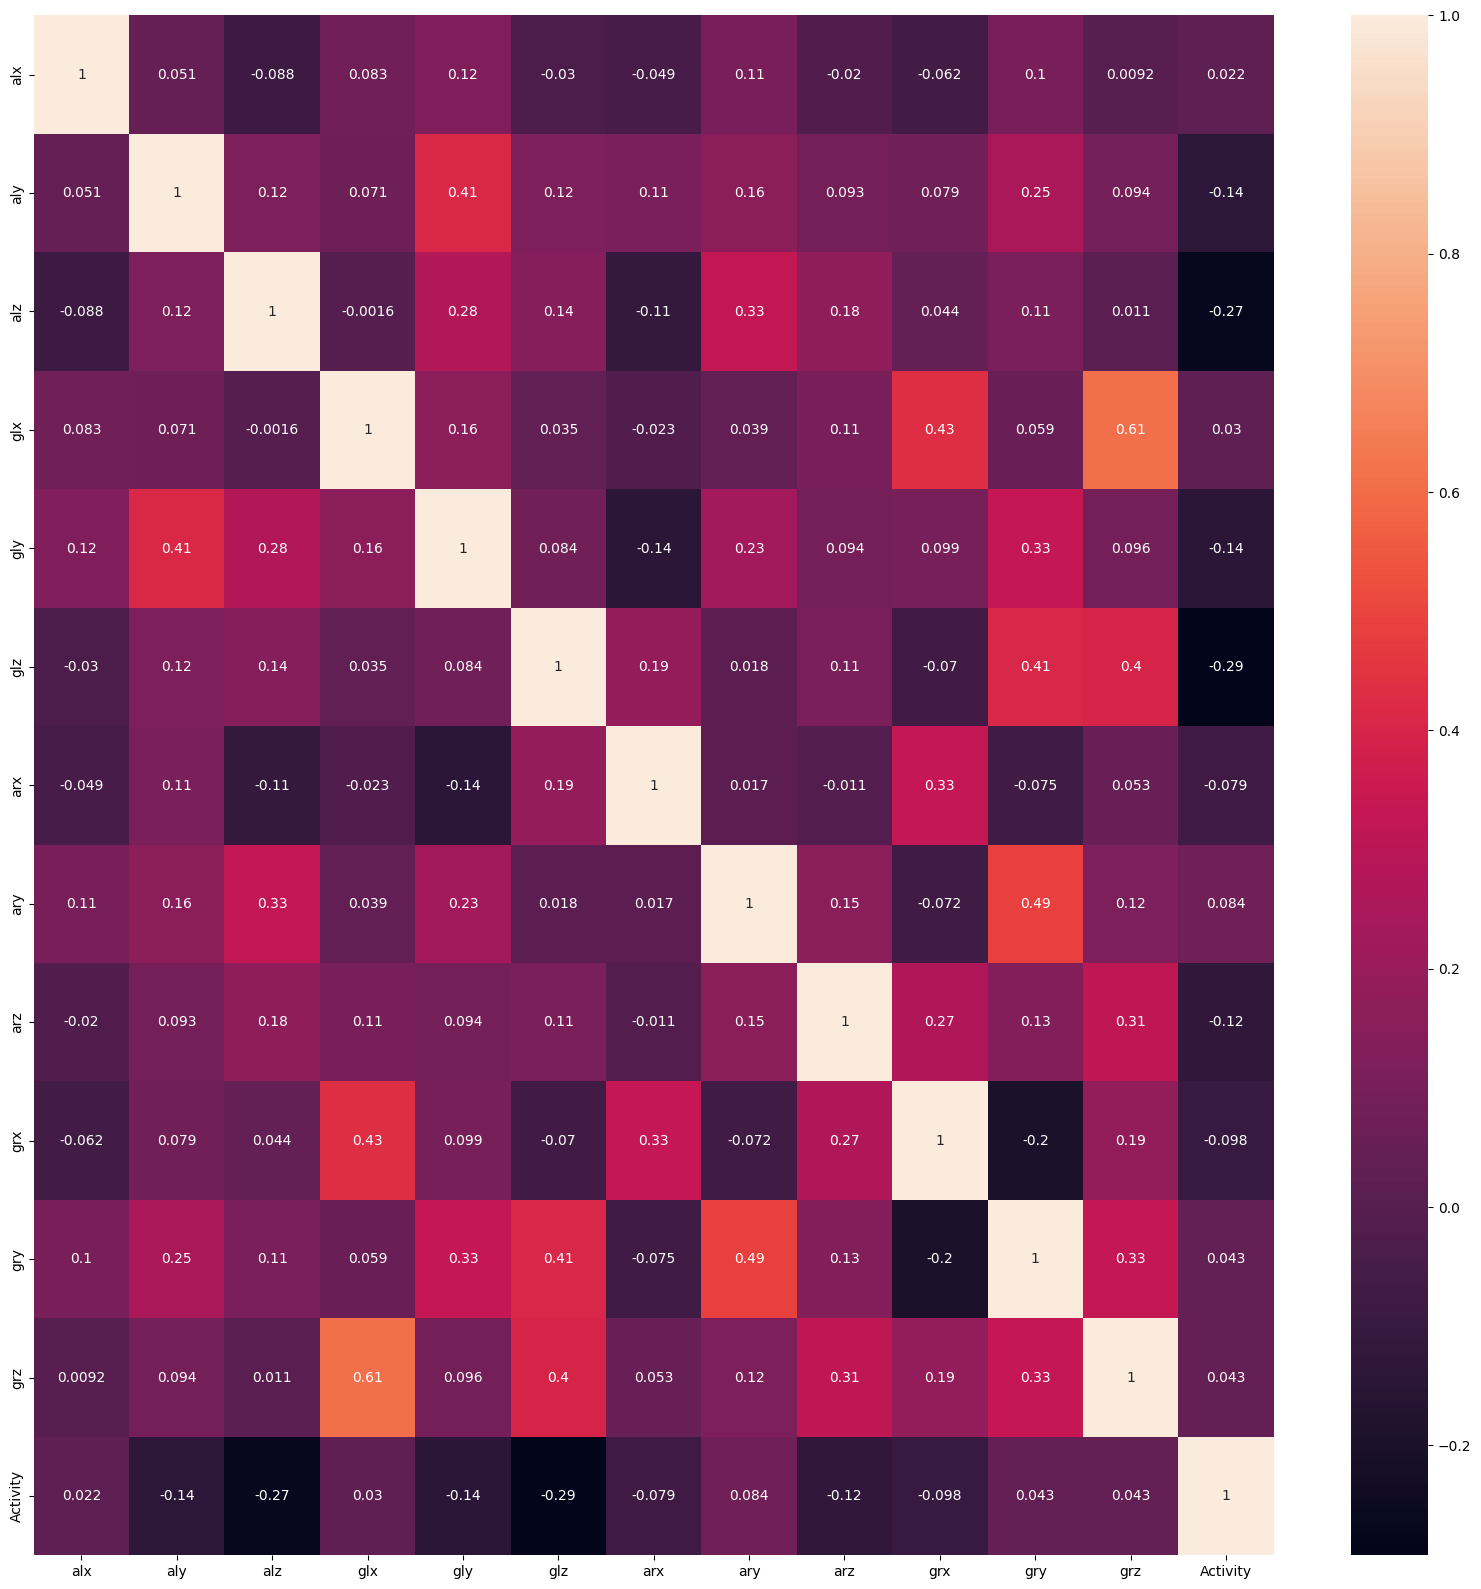

In [ ]:
# Heatmap
data1=data.drop('subject', axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(data1.corr(), annot=True)
plt.show()

In [ ]:
data.drop('subject', axis=1, inplace=True)

In [ ]:
data.head(5)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,1.33590,-9.7394,-1.66110,0.58813,-0.58724,-0.662080,-3.2703,-9.05310,-0.30682,0.401960,-1.06160,0.14655,0
1,2.52730,-12.7320,-3.88220,0.51763,-0.58537,-0.758350,-4.3463,-10.51300,1.71390,-0.272550,-0.76591,0.85129,0
2,0.55205,-9.7466,1.58070,0.55288,-0.76173,-0.176820,-5.8155,-8.16430,-2.42900,0.137250,-0.99795,0.52155,0
3,2.49960,-9.3680,1.81700,0.73655,-0.55159,0.068762,-3.0504,-5.91350,4.65220,0.084314,-0.71047,0.90086,0
4,-3.48370,-9.2520,0.54423,-0.37662,-0.61163,0.609040,-6.5952,-0.79894,7.10590,-0.900000,1.14580,0.81897,0


In [ ]:
X = data.drop('Activity', axis=1)  # Features
y = data['Activity']  # Target variable

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.2, random_state=42)

In [ ]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_KNN = knn.predict(X_test)
print("The accuracy is ",accuracy_score(y_test, y_pred_KNN))

The accuracy is  0.8591725344777301


In [ ]:
#svm
svm = SVC(C=80)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8798800049997917

In [ ]:
y_pred_SVM = svm.predict(X_test)
y_pred_SVM

array([12, 12,  9, ...,  5, 10,  8])

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_log=logistic_regression.predict(X_test)
y_pred_log

array([12, 11,  9, ...,  5, 10,  8])

In [ ]:
print('The accuracy of Logistic Regression is ', accuracy_score(y_test, y_pred_log))

The accuracy of Logistic Regression is  0.5496854297737594


In [ ]:
# Neural Network
# Defining model architecture
model_NN = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

# Compiling model
model_NN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training model
model_NN.fit(X_train, y_train, epochs=31, batch_size=16,validation_data=(X_test, y_test))

# Evaluating model
test_loss, test_acc = model_NN.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/31
4801/4801 [==============================] - 20s 4ms/step - loss: 0.9913 - accuracy: 0.6793 - val_loss: 0.7174 - val_accuracy: 0.7608
Epoch 2/31
4801/4801 [==============================] - 11s 2ms/step - loss: 0.6313 - accuracy: 0.7918 - val_loss: 0.5658 - val_accuracy: 0.8200
Epoch 3/31
4801/4801 [==============================] - 12s 2ms/step - loss: 0.5321 - accuracy: 0.8246 - val_loss: 0.5127 - val_accuracy: 0.8306
Epoch 4/31
4801/4801 [==============================] - 13s 3ms/step - loss: 0.4841 - accuracy: 0.8402 - val_loss: 0.4853 - val_accuracy: 0.8437
Epoch 5/31
4801/4801 [==============================] - 11s 2ms/step - loss: 0.4507 - accuracy: 0.8518 - val_loss: 0.4530 - val_accuracy: 0.8534
Epoch 6/31
4801/4801 [==============================] - 10s 2ms/step - loss: 0.4253 - accuracy: 0.8596 - val_loss: 0.4239 - val_accuracy: 0.8638
Epoch 7/31
4801/4801 [==============================] - 11s 2ms/step - loss: 0.4062 - accuracy: 0.8671 - val_loss: 0.4093 - val_ac

In [ ]:
y_pred_NN = model_NN.predict(X_test)
y_pred_classes = np.argmax(y_pred_NN, axis=1)
y_pred_NN

751/751 [==============================] - 2s 2ms/step


array([[7.2811684e-03, 5.9743609e-38, 1.9296070e-11, ..., 4.6656432e-06,
        3.7345455e-07, 9.8893601e-01],
       [9.1942092e-03, 0.0000000e+00, 3.1291865e-20, ..., 1.9075695e-04,
        2.1336523e-04, 9.9040079e-01],
       [4.2190393e-03, 3.3756370e-29, 1.6681519e-28, ..., 2.3715295e-08,
        4.1823771e-08, 5.8522954e-07],
       ...,
       [1.7400403e-02, 4.1883501e-24, 2.6987393e-06, ..., 3.4582970e-06,
        6.9746380e-07, 1.0988501e-06],
       [4.4441938e-02, 0.0000000e+00, 0.0000000e+00, ..., 9.4979286e-01,
        1.9404416e-04, 5.5374173e-03],
       [2.3063799e-02, 2.8490337e-34, 9.1174739e-17, ..., 4.8699799e-06,
        9.5530154e-08, 1.7013591e-04]], dtype=float32)

In [ ]:
# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([ 6.61571523, 10.18344765,  5.59083185, ...,  6.71342164,
        7.67356715,  7.2505432 ])

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)
#5.5(bad)

R-squared (R2) score: 0.23666089991639538


In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.700137352315947


In [ ]:
# Cross Validation
#KNN
knn_score = cross_val_score(knn, X_val, y_val,cv=5)
print("Cross validation score for KNN:", knn_score)
print("Mean accuracy for KNN:", knn_score.mean())

Cross validation score for KNN: [0.80838323 0.80989583 0.81588542 0.8125     0.81588542]
Mean accuracy for KNN: 0.8125099800399201


In [ ]:
#SVM
svm_score = cross_val_score(svm, X_val, y_val,cv=5)
print("Cross validation score for svm:", svm_score)
print("Mean accuracy for svm:", svm_score.mean())

Cross validation score for svm: [0.82712835 0.8375     0.83619792 0.84166667 0.8375    ]
Mean accuracy for svm: 0.8359985870650005


In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#logistic
log_score = cross_val_score(logistic_regression, X_val, y_val,cv=5)
print("Cross validation score for logistic:", log_score)
print("Mean accuracy for logistic:", log_score.mean())

Cross validation score for logistic: [0.54386878 0.53489583 0.52864583 0.54244792 0.5453125 ]
Mean accuracy for logistic: 0.5390341735008245


In [ ]:
#NN
# Reset indices of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

NN_scores = []

for train_index, val_index in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model_NN.fit(X_train_fold, y_train_fold, epochs=30, batch_size=16, verbose=0)

    accuracy = model_NN.evaluate(X_val_fold, y_val_fold, verbose=0)
    NN_scores.append(accuracy)

print("Cross-validation scores for each fold:", NN_scores)
print("Mean accuracy across all folds:", np.mean(NN_scores))

Cross-validation scores for each fold: [[0.26086774468421936, 0.9202525615692139], [0.24444593489170074, 0.9253906011581421], [0.23313292860984802, 0.927539050579071], [0.24748583137989044, 0.9249349236488342], [0.2164442092180252, 0.9359375238418579]]
Mean accuracy across all folds: 0.5836431309580803


In [ ]:
# Evaluation Metrics
#KNN
print(metrics.classification_report(y_test, y_pred_KNN , digits=3))

              precision    recall  f1-score   support

           0      0.689     0.405     0.510      1919
           1      0.954     0.998     0.975      1851
           2      0.979     1.000     0.989      1827
           3      0.987     1.000     0.993      1878
           4      0.775     0.911     0.837      1892
           5      0.819     0.768     0.793      1813
           6      0.886     0.951     0.917      1893
           7      0.882     0.980     0.928      1820
           8      0.838     0.900     0.868      1797
           9      0.915     0.944     0.929      1847
          10      0.734     0.825     0.777      1848
          11      0.799     0.739     0.768      1797
          12      0.854     0.757     0.802      1819

    accuracy                          0.859     24001
   macro avg      0.855     0.860     0.853     24001
weighted avg      0.854     0.859     0.852     24001



In [ ]:
#SVM
print(metrics.classification_report(y_test, y_pred_SVM , digits=3))

              precision    recall  f1-score   support

           0      0.712     0.412     0.522      1919
           1      0.886     0.998     0.939      1851
           2      0.972     1.000     0.986      1827
           3      0.985     1.000     0.992      1878
           4      0.824     0.893     0.857      1892
           5      0.803     0.778     0.790      1813
           6      0.846     0.907     0.875      1893
           7      0.932     0.930     0.931      1820
           8      0.797     0.877     0.835      1797
           9      0.943     0.971     0.957      1847
          10      0.872     0.899     0.885      1848
          11      0.893     0.923     0.908      1797
          12      0.913     0.866     0.889      1819

    accuracy                          0.880     24001
   macro avg      0.875     0.881     0.874     24001
weighted avg      0.875     0.880     0.873     24001



In [ ]:
#logistic regression
print(metrics.classification_report(y_test, y_pred_log , digits=3))

              precision    recall  f1-score   support

           0      0.136     0.039     0.060      1919
           1      0.530     0.680     0.596      1851
           2      0.535     0.563     0.549      1827
           3      0.960     1.000     0.980      1878
           4      0.473     0.511     0.491      1892
           5      0.428     0.280     0.338      1813
           6      0.452     0.658     0.536      1893
           7      0.649     0.600     0.623      1820
           8      0.442     0.519     0.478      1797
           9      0.739     0.886     0.806      1847
          10      0.594     0.528     0.559      1848
          11      0.536     0.612     0.572      1797
          12      0.329     0.275     0.299      1819

    accuracy                          0.550     24001
   macro avg      0.523     0.550     0.530     24001
weighted avg      0.523     0.550     0.529     24001



In [ ]:
#NN
print(metrics.classification_report(y_test, y_pred_classes , digits=3))

              precision    recall  f1-score   support

           0      0.673     0.540     0.599      1919
           1      0.975     0.991     0.983      1851
           2      0.979     1.000     0.989      1827
           3      0.982     1.000     0.991      1878
           4      0.923     0.875     0.898      1892
           5      0.854     0.881     0.868      1813
           6      0.920     0.946     0.933      1893
           7      0.963     0.918     0.940      1820
           8      0.841     0.965     0.899      1797
           9      0.954     0.976     0.965      1847
          10      0.860     0.890     0.875      1848
          11      0.884     0.884     0.884      1797
          12      0.885     0.871     0.878      1819

    accuracy                          0.902     24001
   macro avg      0.899     0.903     0.900     24001
weighted avg      0.899     0.902     0.899     24001



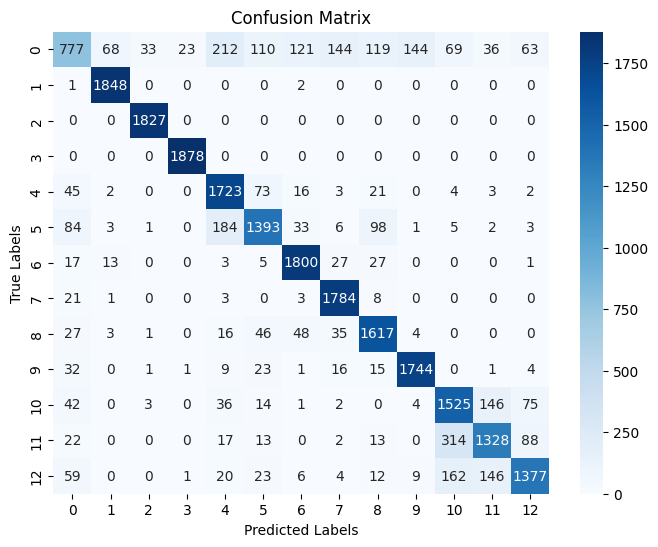

In [ ]:
# Confusion matrix
#KNN
cm = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_KNN = np.diag(cm).sum() / cm.sum()
print("Accuracy:", accuracy_KNN)

Accuracy: 0.8591725344777301


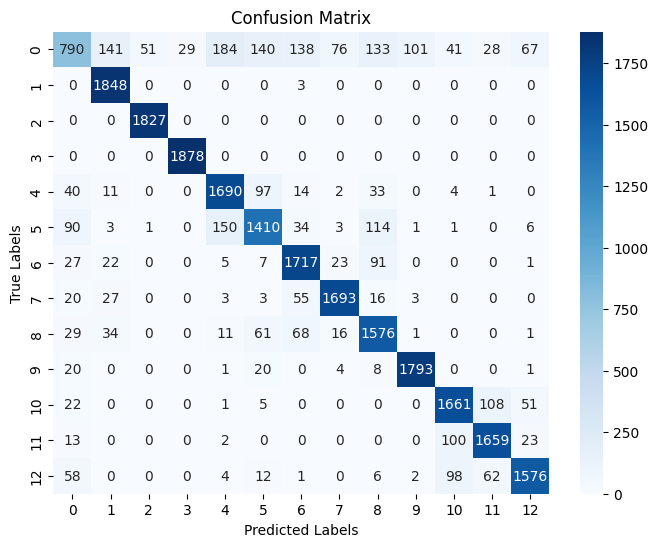

In [ ]:
#SVM
cm = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_SVM = np.diag(cm).sum() / cm.sum()
print("Accuracy:", accuracy_SVM)

Accuracy: 0.8798800049997917


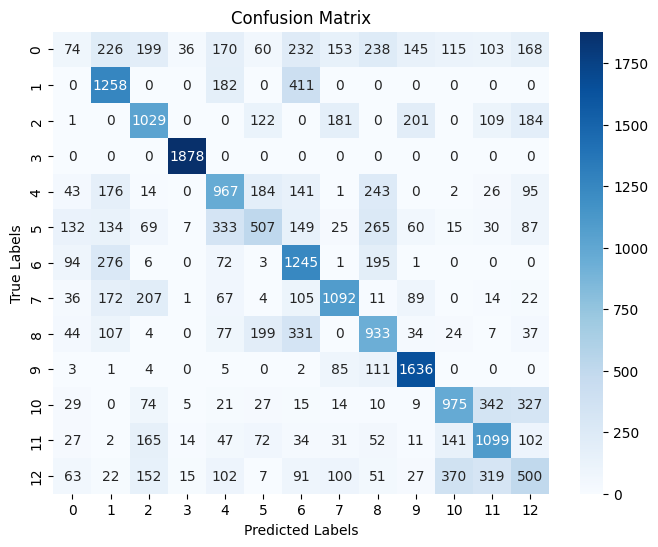

In [ ]:
#Logistic regression
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_log = np.diag(cm).sum() / cm.sum()
print("Accuracy:", accuracy_log)

Accuracy: 0.5496854297737594


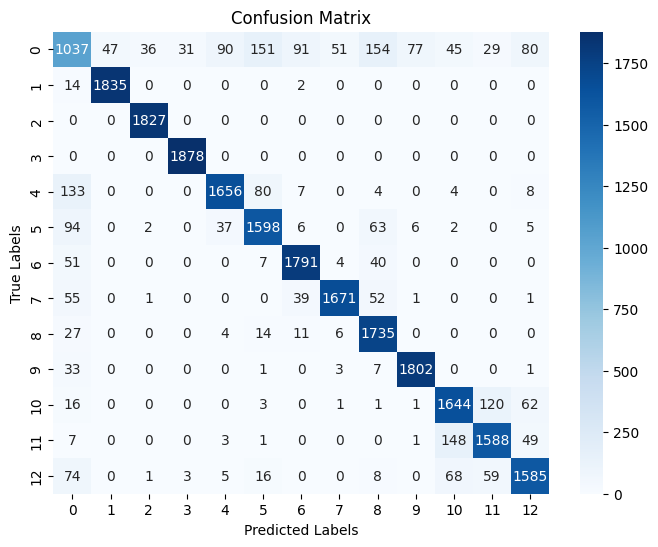

In [ ]:
#NN
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_NN = np.diag(cm).sum() / cm.sum()
print("Accuracy:", accuracy_NN)

Accuracy: 0.9019207533019458
